# Exercise 2.5.2 - Visual Weather Classification with CNN
### The user trains a Convolutional Neural Network (CNN) model to classify four weather conditions from radar images: cloudy, rain, shine, and sunrise.


# Table of Contents
1. Set Up Environment  
2. Load and Preview Dataset  
3. Image Preprocessing and Augmentation  
4. Build CNN Model  
5. Compile and Train Model  
6. Evaluate Model Performance  


# 1. Set Up Environment
### The user imports necessary libraries and sets the base directory for accessing the weather image dataset.


In [1]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


# 2. Load and Preview Dataset
### The user loads weather condition images from the local 'archive' folder and previews the folder structure.


In [2]:
# Set base directory where the 'archive' folder is located
base_dir = 'archive'

# List subdirectories (should be ['cloudy', 'rain', 'shine', 'sunrise'])
print("Classes found:", os.listdir(base_dir))


Classes found: ['Multi-class Weather Dataset']


# 3. Image Preprocessing and Augmentation
### The user applies rescaling and augmentation to the image dataset using Keras' ImageDataGenerator for both training and validation.


In [10]:
# Step 3: Image Preprocessing and Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # <--- Ensure this is 'categorical'
    shuffle=True,
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # <--- Ensure this is 'categorical'
    shuffle=True,
    subset='validation'
)


Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


# 4. Build CNN Model
### The user builds a sequential CNN model with convolution, pooling, flattening, and dense layers for classifying weather images.


In [11]:
# Build model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes: cloudy, rain, shine, sunrise
])


# 5. Compile and Train Model
### The user compiles the CNN model with the Adam optimizer and categorical crossentropy loss, then trains the model while tracking accuracy and loss.


In [12]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=16
)


Epoch 1/16
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 565ms/step - accuracy: 0.4507 - loss: 1.1789 - val_accuracy: 0.4911 - val_loss: 1.0343
Epoch 2/16
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.7877 - loss: 0.5711 - val_accuracy: 0.7857 - val_loss: 0.5430
Epoch 3/16
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.8659 - loss: 0.4214 - val_accuracy: 0.8080 - val_loss: 0.5398
Epoch 4/16
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.8858 - loss: 0.3447 - val_accuracy: 0.8348 - val_loss: 0.5153
Epoch 5/16
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.8994 - loss: 0.2963 - val_accuracy: 0.8259 - val_loss: 0.4593
Epoch 6/16
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.9351 - loss: 0.2147 - val_accuracy: 0.8170 - val_loss: 0.5371
Epoch 7/16
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9487 - loss: 0.1756 - val_accuracy: 0.8438 - val_loss: 0.3965
Epoch 8/16
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.9575 - loss: 0.1524 - val_accuracy: 0

# 6. Evaluate Model Performance
### The user plots training and validation accuracy and loss curves to assess the model’s learning progress and check for overfitting.


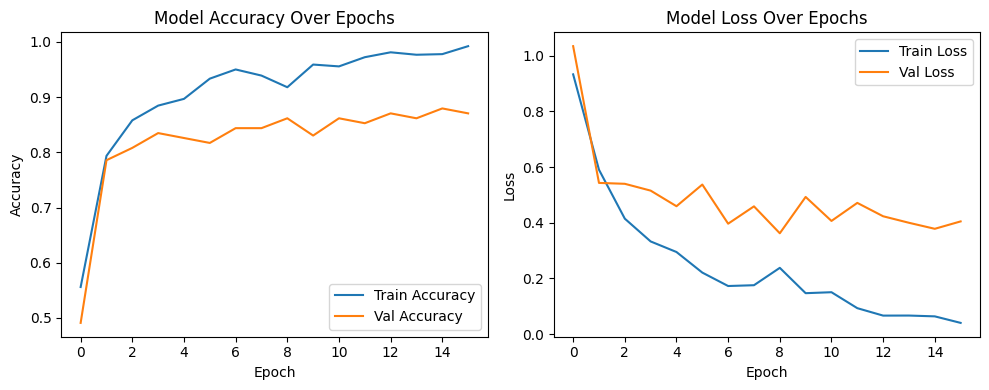

In [13]:
# Plot accuracy and loss
plt.figure(figsize=(10,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


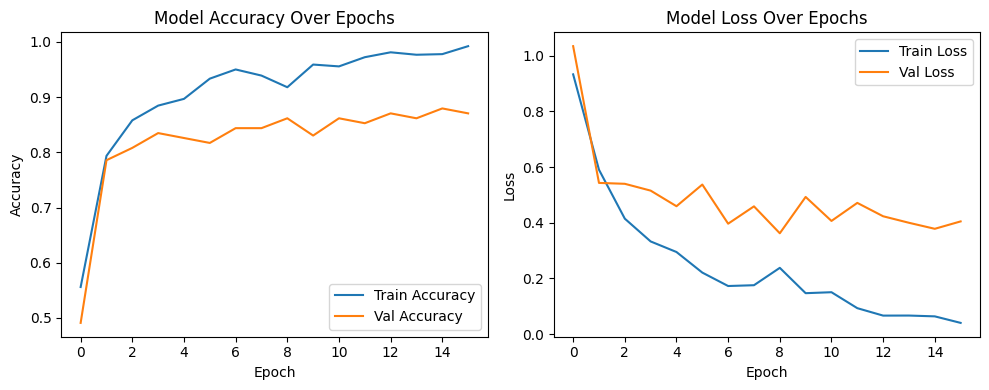

In [14]:
# Plot accuracy and loss
plt.figure(figsize=(10,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig("2.5_visual_cnn_accuracy_loss.png")  # Save chart
plt.show()


# 7. Generate and Visualize Confusion Matrix
### The user makes predictions on the validation set and compares them with the true labels to visualize the model’s performance for each weather category.


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step


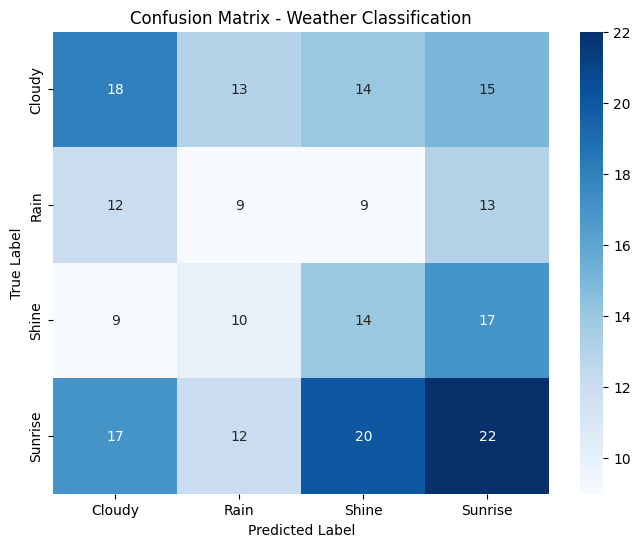

In [15]:
# Import libraries
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Predict and prepare
val_generator.reset()
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
labels = list(val_generator.class_indices.keys())
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot and save confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Weather Classification")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.savefig("2.5_visual_weather_confusion_matrix.png")
plt.show()


# 8. Interpret the Confusion Matrix
### The user provides a short analysis of the confusion matrix to identify model strengths and weaknesses in classifying different weather types.


The confusion matrix shows that the model performs reasonably well in identifying all four weather categories. However, some misclassifications are notable:

- **Sunrise** images were most accurately predicted, with 22 correct out of the group.
- **Cloudy** was the next most accurately classified, with 18 correct predictions, though it was also frequently confused with Shine and Rain.
- **Rain** and **Shine** had the highest misclassification rates, being often predicted as other classes.
- There is a clear overlap in predictions between **Cloudy**, **Shine**, and **Sunrise**, which might indicate visual similarities in those conditions.

The results suggest that while the model is learning meaningful features, additional training, clearer image labeling, or model fine-tuning may improve performance, especially between visually similar weather types.


# 9. Propose Use of GANs in Weather Prediction
### The user outlines three possible applications of Generative Adversarial Networks (GANs) in the field of weather forecasting using image-based data.


**Proposal 1: Simulating Future Weather Scenarios from Satellite Imagery**  
GANs can be trained on historical satellite images to generate future-looking weather simulations. This can help anticipate cloud movements, storm intensities, or fog development in real time, potentially aiding in route planning for air ambulance services.

**Proposal 2: Enhancing Low-Resolution Radar Data**  
GANs can be used for image super-resolution — transforming low-quality or partially corrupted radar images into clearer versions. This can support better weather interpretation in remote areas where radar signals may be weaker or interrupted.

**Proposal 3: Weather Condition Data Augmentation**  
GANs can synthetically generate new weather training images (e.g., more sunrise or rain images), helping balance underrepresented classes in the training dataset. This can improve model accuracy across all classes by reducing class imbalance.

---

**Online Evidence / References:**  
- [Nature Article on GANs for Precipitation Modeling](https://www.nature.com/articles/s41598-023-35093-9)  
- [Climate Change AI – GANs for Downscaling Weather](https://s3.us-east-1.amazonaws.com/climate-change-ai/papers/neurips2019/21/paper.pdf)  
- [UNDRR: GANs for Extreme Weather Event Forecasting](https://www.preventionweb.net/media/82579/download?startDownload=20240924)
